## Library and book import

In [2]:
from spacy.lang.en import English
from urllib import request
from spacy.lang.en.stop_words import STOP_WORDS
import re
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import gensim
from gensim import corpora, models
from gensim.models import LsiModel
from gensim.models.phrases import Phrases
import numpy as np
import pyLDAvis
import pyLDAvis.gensim

In [8]:
url = "http://www.gutenberg.org/files/11/11-0.txt"
response = request.urlopen(url)
book = response.read().decode('utf8')
nlp = English()

## Book and chapters filters

In [9]:
myBook = book[1492:148851]
myChap = [
    book[1492:13267], book[13267:24430],
    book[24430:33906], book[33906:48059],
    book[48059:60374], book[60374:74550],
    book[74550:87604], book[87604:101587],
    book[101587:114545], book[114545:126262],
    book[126262:136916], book[136916:148851]]
nlp_book = nlp(myBook)

## Book only

In [10]:
for token in nlp_book:
    token = token.lemma_

In [11]:
token_list = []
for token in nlp_book:
    token_list.append(token.text)

In [12]:
filtered_book =[] 

for token in token_list:
    term = nlp.vocab[token]
    if term.is_stop == False:
        filtered_book.append(token)

In [13]:
my_stopwords = ["said"]
second_filter = []
for token in filtered_book:
    if token not in my_stopwords:
        second_filter.append(token)

In [14]:
refiltered_book =[]
for token in second_filter:
    if re.sub(r"[^a-zA-ZÀ-ÿ0-9]+", ' ', token) != ' ':
        refiltered_book.append(re.sub(r"[^a-zA-ZÀ-ÿ0-9]+", '', token))

In [15]:
wordList = ' '.join(token for token in refiltered_book)
cloud = WordCloud(width = 1024, height = 768, 
                background_color ='blue', 
                min_font_size = 10).generate(wordList) 

(-0.5, 1023.5, 767.5, -0.5)

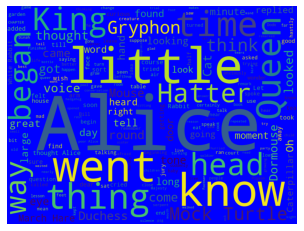

In [16]:
plt.imshow(cloud)
plt.axis('off')

## Chapters only (12)

In [17]:
nlp_chap = []
for chapter in myChap:
    nlp_chap.append(nlp(chapter))

In [18]:
for chapter in nlp_chap:
    for token in chapter:
        token = token.lemma_

In [19]:
token_list = []
for chapter in nlp_chap:
    buffer_list = []
    for token in chapter:
        buffer_list.append(token.text)
    token_list.append(buffer_list)

In [20]:
filtered_chap =[] 

for tokens in token_list:
    buffer_list = []
    for token in tokens:
        term = nlp.vocab[token]
        if term.is_stop == False:
            buffer_list.append(token)
    filtered_chap.append(buffer_list)

In [21]:
my_stopwords = ["said"]
second_chap_filter = []

for tokens in filtered_chap:
    buffer_list = []
    for token in tokens:
        if token not in my_stopwords:
            buffer_list.append(token)
    second_chap_filter.append(buffer_list)

In [22]:
refiltered_chaps =[]

for tokens in second_chap_filter:
    buffer_list = []
    for token in tokens:
        if re.sub(r"[^a-zA-ZÀ-ÿ0-9]+", ' ', token) != ' ':
            buffer_list.append(re.sub(r"[^a-zA-ZÀ-ÿ0-9]+", '', token))
    refiltered_chaps.append(buffer_list)

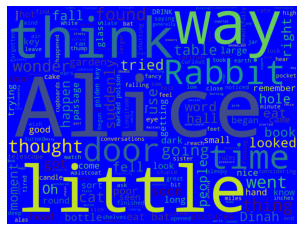

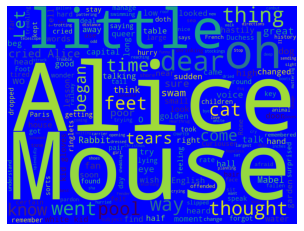

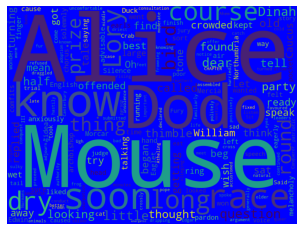

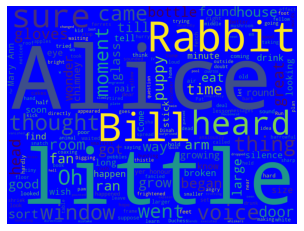

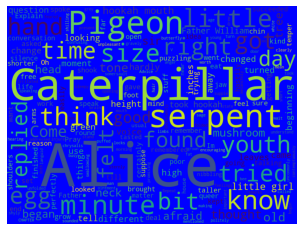

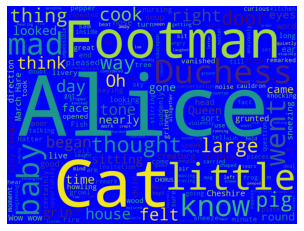

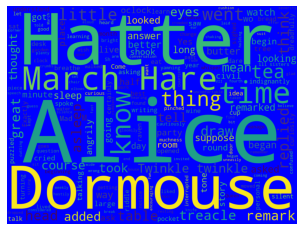

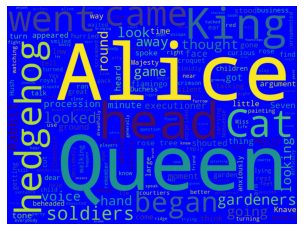

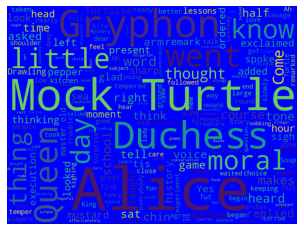

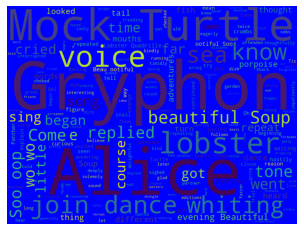

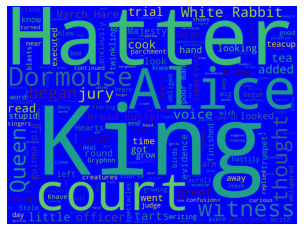

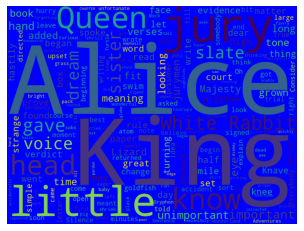

In [23]:
for chapter in refiltered_chaps:
    wordList = ' '.join(token for token in chapter)
    cloud = WordCloud(width = 1024, height = 768, background_color ='blue', min_font_size = 10).generate(wordList) 
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

## LSI and top 5 topics plot

In [24]:
# storing the extracted chapters into the dictionary 
my_dictionary = corpora.Dictionary(refiltered_chaps) 

In [25]:
# creating the corpus
BoW_corpus = [my_dictionary.doc2bow(doc, allow_update = True) for doc in refiltered_chaps] 

In [27]:
# Training the model with LSI 
LSI_model = LsiModel(corpus = BoW_corpus, id2word = my_dictionary, num_topics = 10, decay = 0.5) 
  
# Topics 
topics = LSI_model.show_topics(5, 3, formatted=False)
topics = [t for (i,t) in topics]
topics

[[('Alice', 0.6992718079797501),
  ('little', 0.2113260526851137),
  ('went', 0.1503874030007102)],
 [('Turtle', 0.4555041404522831),
  ('Mock', 0.43296272098251704),
  ('Gryphon', 0.4159425204129387)],
 [('Hatter', -0.4663760945472173),
  ('Dormouse', -0.36870523234584673),
  ('March', -0.2598031943994968)],
 [('Queen', 0.5091006067279144),
  ('King', 0.4457209209226677),
  ('little', -0.14499106206499487)],
 [('King', 0.26424009456224606),
  ('Cat', -0.22736796986687022),
  ('Duchess', -0.21552471005907547)]]

<!-- #HERE WE TRY SCIKIT
tsne = TSNE(random_state=0)
tsne_results = tsne.fit_transform(df)

tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=wine.target)
plt.show()
from sklearn.manifold import TSNE -->

In [29]:
absc, ordo = [], []
for elt in topics:
    a = zip(*elt)
    l_elt = list(a)
    absc.append(" ".join(l_elt[0]))
    ordo.append(np.sum(np.abs(l_elt[1])))
print(absc, ordo)

['Alice little went', 'Turtle Mock Gryphon', 'Hatter Dormouse March', 'Queen King little', 'King Cat Duchess'] [1.060985263665574, 1.304409381847739, 1.0948845212925609, 1.0998125897155768, 0.7071327744881918]


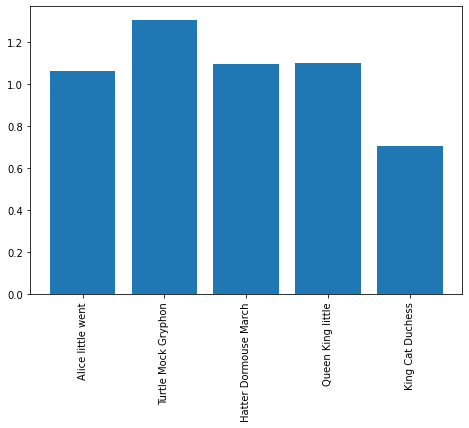

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#absc = ['Alice little went', 'Turtle Mock Gryphon', 'Hatter Dormouse March', 'Queen King little', 'King Cat Duchess']
ax.bar(absc,ordo)
plt.xticks(rotation=90)
plt.show()

In [87]:
word_weight =[] 
for doc in BoW_corpus: 
  for id, freq in doc: 
    word_weight.append([my_dictionary[id], freq]) 

In [33]:
tfIdf = models.TfidfModel(BoW_corpus, smartirs ='ntc')
weight_tfidf =[] 
for doc in tfIdf[BoW_corpus]: 
  for id, freq in doc: 
    weight_tfidf.append([my_dictionary[id], np.around(freq, decimals = 3)]) 
weight_tfidf

[['Alice', 0.043],
 ['Antipathies', 0.05],
 ['Australia', 0.05],
 ['CHAPTER', 0.002],
 ['Come', 0.003],
 ['DRINK', 0.036],
 ['Dinah', 0.091],
 ['Dinahll', 0.036],
 ['Drink', 0.05],
 ['EAT', 0.05],
 ['Hole', 0.05],
 ['I', 0.05],
 ['Latitude', 0.1],
 ['Let', 0.012],
 ['Longitude', 0.1],
 ['MARMALADE', 0.05],
 ['Maam', 0.05],
 ['New', 0.05],
 ['ORANGE', 0.05],
 ['Oh', 0.02],
 ['Presently', 0.036],
 ['Rabbit', 0.072],
 ['Soon', 0.05],
 ['Suddenly', 0.05],
 ['White', 0.024],
 ['Zealand', 0.05],
 ['actually', 0.05],
 ['advice', 0.05],
 ['advise', 0.05],
 ['afraid', 0.009],
 ['air', 0.019],
 ['alas', 0.073],
 ['aloud', 0.019],
 ['altogether', 0.023],
 ['answer', 0.012],
 ['anxiously', 0.012],
 ['apple', 0.05],
 ['ask', 0.019],
 ['asking', 0.023],
 ['ate', 0.05],
 ['away', 0.005],
 ['bank', 0.028],
 ['bat', 0.073],
 ['bats', 0.199],
 ['beasts', 0.036],
 ['beautifully', 0.1],
 ['beds', 0.036],
 ['began', 0.005],
 ['begin', 0.005],
 ['beginning', 0.009],
 ['begun', 0.037],
 ['belong', 0.05],
 ['

In [ ]:
# Bigram using Phraser Model 
bigram = Phrases(refiltered_chaps) 
bigram_mod = gensim.models.phrases.Phraser(bigram)
#print(bigram_model[refiltered_chaps[1]])

In [ ]:
# Trigram using Phraser Model 
trigram = Phrases(bigram[refiltered_chaps]) 
trigram_mod = gensim.models.phrases.Phraser(trigram)
#print(trigram_model[bigram_model[refiltered_chaps[1]]])

## How to find chapters

In [ ]:
book.index('CHAPTER I.', 1011)

In [ ]:
book.index('CHAPTER II.', 1049)

In [ ]:
book.index('CHAPTER III.', 1084)

In [ ]:
book.index('CHAPTER IV.', 1131)

In [ ]:
book.index('CHAPTER V.', 1182)

In [ ]:
book.index('CHAPTER VI.', 1225)

In [ ]:
book.index('CHAPTER VII.', 1257)

In [ ]:
book.index('CHAPTER VIII.', 1290)

In [ ]:
book.index('CHAPTER IX.', 1334)

In [ ]:
book.index('CHAPTER X.', 1375)

In [ ]:
book.index('CHAPTER XI.', 1414)

In [ ]:
book.index('CHAPTER XII.', 1452)

In [ ]:
book.index('THE END')